# Analyzing Data for Rotational Churners

**Group 6**
 - Timothy Chan
 - Rhyle Nodnylson Guinto
 - Chino Laguda
 - Randall Joseph Pajaro

Loading the churner data and data of the newer/more recent users

In [1]:
import numpy as np
import pandas as pd

dfs = pd.ExcelFile('data/mock/sample_mock_c_data.xlsx')
sheets = dfs.sheet_names
d = []
for i in range(10):
    d.append(dfs.parse(sheet_name=sheets[i]))

newer_users = pd.read_excel('data/mock/sample_mock_rc_data.xlsx')

In [2]:
d[0].head()

,weeks,IMEI,phone_nums,credits_loaded_per_week,num_hrs_spend_on_net,mobile_data_usage(gb),promos_used,active_times,activity_status
0,2018-04-17,772605788289199,9369298671,20,17.9,7.51,7,2,0
1,2018-04-24,772605788289199,9369298671,800,1.1,5.55,0,2,0
2,2018-05-01,772605788289199,9369298671,30,20.1,6.78,8,2,0
3,2018-05-08,772605788289199,9369298671,800,12.9,8.65,7,1,0
4,2018-05-15,772605788289199,9369298671,0,14.8,7.28,3,0,0


In [3]:
newer_users.head()

,weeks,IMEI,phone_nums,credits_loaded_per_week,num_hrs_spend_on_net,mobile_data_usage(gb),promos_used,active_times,activity_status
0,2018-12-11,5969775737476310,9995451837,50,19.2,7.5,9,0,0
1,2018-12-18,5969775737476310,9995451837,1000,1.1,4.0,1,2,0
2,2018-12-25,5969775737476310,9995451837,70,20.1,6.8,7,2,0
3,2019-01-01,5969775737476310,9995451837,1000,12.1,6.7,5,1,0
4,2019-01-08,5969775737476310,9995451837,0,14.8,7.7,2,1,0


In [4]:
df1 = d[0].iloc[:-4, :-3]
df2 = newer_users.iloc[:len(df1), :-3]
df3 = d[3].iloc[:len(df1), :-3]
print(len(df1), ' ', len(df2), ' ', len(df3))

29   29   29


# Using Euclidean Distance to Compare how Similar the New User is to a Churner

In [5]:
def Euclidean_Dist(df1, df2, cols=d[0].columns[3:-3]):
    return (np.linalg.norm(df1[cols].values - df2[cols].values, axis=1))

In [6]:
df1.head()

,weeks,IMEI,phone_nums,credits_loaded_per_week,num_hrs_spend_on_net,mobile_data_usage(gb)
0,2018-04-17,772605788289199,9369298671,20,17.9,7.51
1,2018-04-24,772605788289199,9369298671,800,1.1,5.55
2,2018-05-01,772605788289199,9369298671,30,20.1,6.78
3,2018-05-08,772605788289199,9369298671,800,12.9,8.65
4,2018-05-15,772605788289199,9369298671,0,14.8,7.28


In [7]:
distances = Euclidean_Dist(df1, df2)
distances

array([3.00281551e+01, 2.00006006e+02, 4.00000050e+01, 2.00011106e+02,
       4.20000000e-01, 3.00331167e+01, 8.00001379e+02, 9.10000811e+02,
       9.20000000e-01, 2.68000000e+00, 5.00143989e+01, 2.00000225e+01,
       3.01935771e+01, 2.61007663e+00, 9.80000862e+02, 1.10040901e+00,
       1.80277564e+00, 9.50002981e+02, 7.00003959e+02, 1.50053324e+00,
       9.10002831e+02, 5.00636435e+01, 2.00090205e+01, 1.68237927e+00,
       3.01552798e+01, 9.30003098e+02, 1.50000000e+02, 3.00004817e+02,
       2.58000000e+00])

In [8]:
distances.mean()

253.3045256480743

In [9]:
# comparing it to another user who is not related
distances1 = Euclidean_Dist(df2, df3)
distances1

array([  30.09007311, 1000.01516334,   50.71197985,  950.00601203,
          8.62160658,   31.66172611, 1000.01957086, 1000.02617411,
          2.50008   ,    7.2510413 ,  100.69451028,   81.05189449,
         30.9141149 ,   17.67399219, 1000.00388144,    5.970335  ,
         10.40461917,  910.16896761,  950.09294893,    8.17273516,
        200.30027459,   70.46020153,   22.08241155,    1.13507709,
         17.37475467, 1000.10919609,   60.66125287,  500.10574492,
          3.80426077])

In [10]:
distances1.mean()

312.8305034665228

### As we can see, the new user is much more similar to churner 1 compared to churner 2 when using euclidean distance.

In [11]:
df1_sums = df1.groupby('IMEI')[d[0].columns[3:-3]].sum()
df2_sums = df2.groupby('IMEI')[d[0].columns[3:-3]].sum()
df3_sums = df3.groupby('IMEI')[d[0].columns[3:-3]].sum()

In [12]:
# Modifying the Euchlidean Distance function
def Mod_Euclidean_Dist(df1,df2,cols=d[0].columns[3:-3]):
    x = df1.groupby('IMEI')[cols].sum()
    y = df2.groupby('IMEI')[cols].sum()

    return np.linalg.norm(x.values - y.values,
                   axis=1)

In [13]:
mod_distances = Mod_Euclidean_Dist(df1,df2)
mod_distances 

# the first euclidean distance result produced a much better result in terms of comparing the difference of the 2 dataframes

array([6730.01072454])

# Different Mathematical Approach for Comparing

Computation:
 - a = list of sums in each column of df1
 - b = list of sums in each column of df2
 - c = l/h (list of similarities per column; l = lower value in a certain index of lists a and b; h = higher value)

 similarity = (sum(c)/len(c))*100

In [14]:
def average_similarity(df1_sums, df2_sums):
    percent_sim = []

    for i in range(len(df1_sums.columns.tolist())):
        x = 0
        y = 0
        if df1_sums[df1_sums.columns.tolist()[i]].tolist() < df2_sums[df2_sums.columns.tolist()[i]].tolist():
            x = df1_sums[df1_sums.columns.tolist()[i]].tolist()[0]
            y = df2_sums[df2_sums.columns.tolist()[i]].tolist()[0]
        else:
            x = df2_sums[df2_sums.columns.tolist()[i]].tolist()[0]
            y = df1_sums[df1_sums.columns.tolist()[i]].tolist()[0]
        percent_sim.append(x/y)
        
    return percent_sim

In [15]:
df1_sums

,credits_loaded_per_week,num_hrs_spend_on_net,mobile_data_usage(gb)
IMEI,,,
772605788289199,3690,369.8,205.68


In [16]:
df2_sums

,credits_loaded_per_week,num_hrs_spend_on_net,mobile_data_usage(gb)
IMEI,,,
5969775737476310,10420,378.6,197.5


In [17]:
df3_sums

,credits_loaded_per_week,num_hrs_spend_on_net,mobile_data_usage(gb)
IMEI,,,
376328182885989,1600,348.1,203.34


In [18]:
av1 = average_similarity(df1_sums,df2_sums)
av2 = average_similarity(df3_sums,df2_sums)

In [19]:
ave_sim1 = sum(av1)/len(av1)*100
ave_sim2 = sum(av2)/len(av2)*100
print('Similarity is: {:.2f}%'.format(float(ave_sim1)))
print('Similarity is: {:.2f}%'.format(float(ave_sim2)))

Similarity is: 76.37%
Similarity is: 68.14%


### Computing Similarity per Row and Computing the Average Similarity

In [20]:
df1.head(3)

,weeks,IMEI,phone_nums,credits_loaded_per_week,num_hrs_spend_on_net,mobile_data_usage(gb)
0,2018-04-17,772605788289199,9369298671,20,17.9,7.51
1,2018-04-24,772605788289199,9369298671,800,1.1,5.55
2,2018-05-01,772605788289199,9369298671,30,20.1,6.78


In [21]:
df2.head(3)

,weeks,IMEI,phone_nums,credits_loaded_per_week,num_hrs_spend_on_net,mobile_data_usage(gb)
0,2018-12-11,5969775737476310,9995451837,50,19.2,7.5
1,2018-12-18,5969775737476310,9995451837,1000,1.1,4.0
2,2018-12-25,5969775737476310,9995451837,70,20.1,6.8


In [22]:
vals = [[],[],[],[],[]]

z=0
for i in df1.columns[3:]:
    for j in range(len(df1[i].tolist())):
        x = 0
        y = 0
        if df1[i].tolist()[j] < df2[i].tolist()[j]:
            x = df1[i].tolist()[j]
            y = df2[i].tolist()[j]
        else:
            y = df1[i].tolist()[j]
            x = df2[i].tolist()[j]
        
        if x == 0 and y == 0:
            vals[z].append(100.00)
        else:
            vals[z].append(round((x/y)*100,2))
    z+=1

# I could have just used df1['column'] / df2['column'] or df2['column'] / df1['column'], but it does not check for division by 0s.
# I also needed to check which value was lower as that will be the dividend.

In [23]:
data_dict = {}
k=0
for i in df1.columns[3:]:
    data_dict[i] = vals[k]
    k+=1

sim_df = pd.DataFrame(data_dict)

In [24]:
sim_df.head()

,credits_loaded_per_week,num_hrs_spend_on_net,mobile_data_usage(gb)
0,40.00,93.23,99.87
1,80.00,100.00,72.07
2,42.86,100.00,99.71
3,80.00,93.80,77.46
4,100.00,100.00,94.55


In [25]:
sim_df['similarity'] = ((sim_df[sim_df.columns[0]] + sim_df[sim_df.columns[1]] + sim_df[sim_df.columns[2]])/300)*100
sim_df.head()

,credits_loaded_per_week,num_hrs_spend_on_net,mobile_data_usage(gb),similarity
0,40.00,93.23,99.87,77.700000
1,80.00,100.00,72.07,84.023333
2,42.86,100.00,99.71,80.856667
3,80.00,93.80,77.46,83.753333
4,100.00,100.00,94.55,98.183333


In [26]:
sim_df['similarity'].mean()

76.68712643678163

### Computing using Pandas DataFrame method

In [27]:
sim_df2 = pd.DataFrame()

sim_df2['sim1'] = df1['credits_loaded_per_week']/df2['credits_loaded_per_week']
sim_df2['sim2'] = df1['num_hrs_spend_on_net']/df2['num_hrs_spend_on_net']
sim_df2['sim3'] = df1['mobile_data_usage(gb)']/df2['mobile_data_usage(gb)']
sim_df2.loc[sim_df2['sim1']>1,'sim1'] = 1/sim_df2['sim1']
sim_df2.loc[sim_df2['sim2']>1,'sim2'] = 1/sim_df2['sim2']
sim_df2.loc[sim_df2['sim3']>1,'sim3'] = 1/sim_df2['sim3']
sim_df2['sim1'] *= 100
sim_df2['sim2'] *= 100
sim_df2['sim3'] *= 100
sim_df2['similarity'] = ((sim_df2['sim1'] + sim_df2['sim2'] + sim_df2['sim3'])/300)*100

sim_df3 = pd.DataFrame()
sim_df3['sim1'] = df3['credits_loaded_per_week']/df2['credits_loaded_per_week']
sim_df3['sim2'] = df3['num_hrs_spend_on_net']/df2['num_hrs_spend_on_net']
sim_df3['sim3'] = df3['mobile_data_usage(gb)']/df2['mobile_data_usage(gb)']
sim_df3.loc[sim_df3['sim1']>1,'sim1'] = 1/sim_df3['sim1']
sim_df3.loc[sim_df3['sim2']>1,'sim2'] = 1/sim_df3['sim2']
sim_df3.loc[sim_df3['sim3']>1,'sim3'] = 1/sim_df3['sim3']
sim_df3['sim1'] *= 100
sim_df3['sim2'] *= 100
sim_df3['sim3'] *= 100
sim_df3['similarity'] = ((sim_df3['sim1'] + sim_df3['sim2'] + sim_df3['sim3'])/300)*100

print('Similarity is: {:.2f}%'.format(sim_df2['similarity'].mean()))
print('Similarity is: {:.2f}%'.format(sim_df3['similarity'].mean()))

68.99026443575166

# Similarity using Cosine Similarity

In [28]:
d1 = df1.iloc[:, 3:].copy()
d2 = df2.iloc[:, 3:].copy()
d3 = df3.iloc[:, 3:].copy()

d1.head()

,credits_loaded_per_week,num_hrs_spend_on_net,mobile_data_usage(gb)
0,20,17.9,7.51
1,800,1.1,5.55
2,30,20.1,6.78
3,800,12.9,8.65
4,0,14.8,7.28


Instead of comparing each value from a column to other columns as it would generate a matrix, cosine similarities would be utilized to compare the similarities between similar columns of the dataframes. (cosine_sim(df1_col1,df2_col1))

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

cs1 = cosine_similarity([d1[i].tolist() for i in d1.columns],[d2[i].tolist() for i in d2.columns])
cs2 = cosine_similarity([d3[i].tolist() for i in d3.columns],[d2[i].tolist() for i in d2.columns])
average_sim1 = (sum(cs1.diagonal().tolist())/len(cs1.diagonal().tolist()))*100
average_sim2 = (sum(cs2.diagonal().tolist())/len(cs2.diagonal().tolist()))*100

print('Average Similarity of {} and {} is {:.2f}%'.format(df1['phone_nums'][0], df2['phone_nums'][0], average_sim1))
print('Average Similarity of {} and {} is {:.2f}%'.format(df3['phone_nums'][0], df2['phone_nums'][0], average_sim2))

Average Similarity of 9369298671 and 9995451837 is 88.79%
Average Similarity of 9471296631 and 9995451837 is 72.85%


# Data Visualizations

In [30]:
from matplotlib import pyplot as plt

In [31]:
dv1 = pd.DataFrame({
    'c{}_phone_nums'.format(0):df1['phone_nums'].tolist(),
    'c{}_credits_loaded_per_week'.format(0):df1['credits_loaded_per_week'].tolist(),
    'c{}_num_hrs_spend_on_net'.format(0):df1['num_hrs_spend_on_net'].tolist(),
    'c{}_mobile_data_usage(gb)'.format(0):df1['mobile_data_usage(gb)'].tolist(),
    'rc{}_phone_nums'.format(0):df2['phone_nums'].tolist(),
    'rc{}_credits_loaded_per_week'.format(0):df2['credits_loaded_per_week'].tolist(),
    'rc{}_num_hrs_spend_on_net'.format(0):df2['num_hrs_spend_on_net'].tolist(),
    'rc{}_mobile_data_usage(gb)'.format(0):df2['mobile_data_usage(gb)'].tolist()
    })

dv2 = pd.DataFrame({
    'c{}_phone_nums'.format(3):df3['phone_nums'].tolist(),
    'c{}_credits_loaded_per_week'.format(3):df3['credits_loaded_per_week'].tolist(),
    'c{}_num_hrs_spend_on_net'.format(3):df3['num_hrs_spend_on_net'].tolist(),
    'c{}_mobile_data_usage(gb)'.format(3):df3['mobile_data_usage(gb)'].tolist(),
    'rc{}_phone_nums'.format(0):df2['phone_nums'].tolist(),
    'rc{}_credits_loaded_per_week'.format(0):df2['credits_loaded_per_week'].tolist(),
    'rc{}_num_hrs_spend_on_net'.format(0):df2['num_hrs_spend_on_net'].tolist(),
    'rc{}_mobile_data_usage(gb)'.format(0):df2['mobile_data_usage(gb)'].tolist()
    })

dv1.head()

,c0_phone_nums,c0_credits_loaded_per_week,c0_num_hrs_spend_on_net,c0_mobile_data_usage(gb),rc0_phone_nums,rc0_credits_loaded_per_week,rc0_num_hrs_spend_on_net,rc0_mobile_data_usage(gb)
0,9369298671,20,17.9,7.51,9995451837,50,19.2,7.5
1,9369298671,800,1.1,5.55,9995451837,1000,1.1,4.0
2,9369298671,30,20.1,6.78,9995451837,70,20.1,6.8
3,9369298671,800,12.9,8.65,9995451837,1000,12.1,6.7
4,9369298671,0,14.8,7.28,9995451837,0,14.8,7.7


## Comparison of Number of Hrs spent on the Internet of a New User from Different Churners

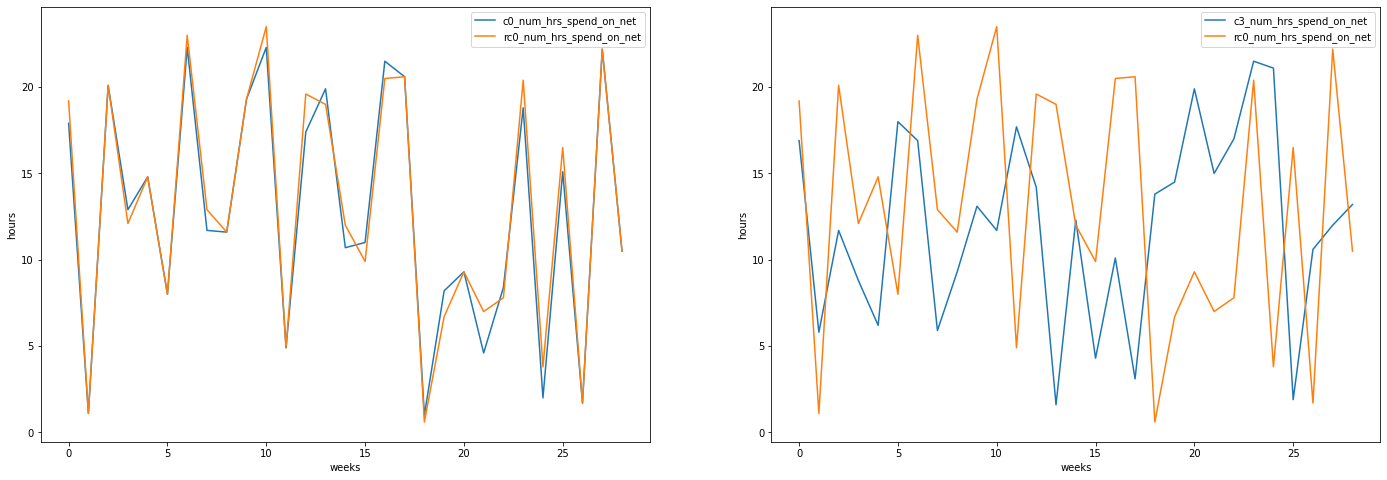

In [32]:
plt.rcParams["figure.figsize"] = (24,8)

plt.subplot(1,2,1)
ax1 = dv1.plot.line(y=['c0_num_hrs_spend_on_net','rc0_num_hrs_spend_on_net'], ax=plt.gca())
plt.xlabel('weeks')
plt.ylabel('hours')

plt.subplot(1,2,2)
ax2 = dv2.plot.line(y=['c3_num_hrs_spend_on_net','rc0_num_hrs_spend_on_net'], ax=plt.gca())
plt.xlabel('weeks')
plt.ylabel('hours')

plt.show()

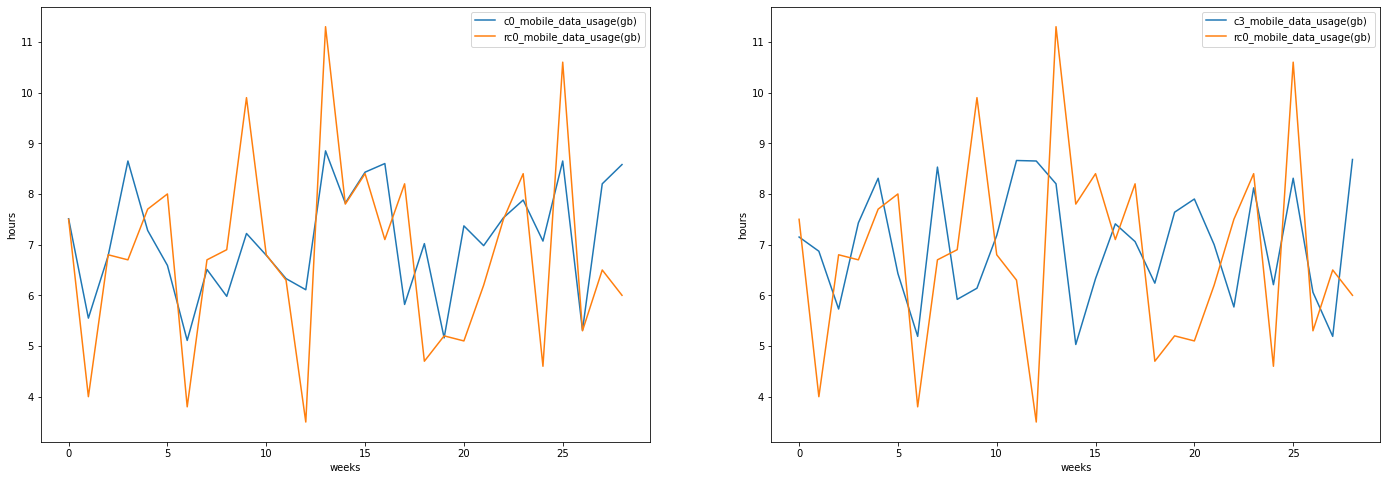

In [33]:
plt.subplot(1,2,1)
ax1 = dv1.plot.line(y=['c0_mobile_data_usage(gb)','rc0_mobile_data_usage(gb)'], ax=plt.gca())
plt.xlabel('weeks')
plt.ylabel('hours')

plt.subplot(1,2,2)
ax2 = dv2.plot.line(y=['c3_mobile_data_usage(gb)','rc0_mobile_data_usage(gb)'], ax=plt.gca())
plt.xlabel('weeks')
plt.ylabel('hours')

plt.show()